# **Load Data**

In [ ]:
import pandas as pd
import difflib
import re

df = pd.read_csv('/content/manga_list.csv')

# **Cleaning**

In [ ]:
# Clean Jenis Komik
df.dropna(subset=['Jenis komik'], inplace=True)

# Clean Chapter Number
df['Last Chapter Number'] = pd.to_numeric(df['Last Chapter Number'], errors='coerce')

# Drop rows where 'Chapter Number' is NaN (non-numeric)
df = df.dropna(subset=['Last Chapter Number'])

# Clean Status
valid_statuses = ['End', 'Ongoing']
df = df[df['Status'].isin(valid_statuses)]

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

# **Cleaning Genre**

In [ ]:
# Daftar genre yang valid dan umum
genre_strings = df['Genre'].unique().tolist()

all_genres = [re.findall(r"'([^']+)'", genre_str) for genre_str in genre_strings]

# Flatten the list of lists and get unique genres
unique_genres = list(set([genre for sublist in all_genres for genre in sublist]))
valid_genres = [genre.lower() for genre in unique_genres]

# print(unique_genres)

# Fungsi untuk membersihkan genre
def clean_genre(genre_col):


    # Memisahkan dan membersihkan setiap genre dalam list
    cleaned_genres = []
    for genre_list in genre_col:
        genres = genre_list.split(',')  # Misalkan genre dipisahkan dengan koma
        cleaned_list = []
        for genre in genres:
            genre = genre.strip().lower()  # Menghilangkan spasi berlebih dan mengubah ke huruf kecil
            # Mencari genre yang mirip dari daftar genre yang valid
            closest_match = difflib.get_close_matches(genre, valid_genres, n=1, cutoff=0.8)
            if closest_match:
                cleaned_list.append(closest_match[0])
            else:
                cleaned_list.append(genre)  # Jika tidak ada yang cocok, pertahankan seperti asli
        cleaned_genres.append(', '.join(cleaned_list))

    return cleaned_genres

# Membersihkan kolom genre
df['Cleaned_Genre'] = clean_genre(df['Genre'])

# Menampilkan hasilnya
df[['Genre', 'Cleaned_Genre']].head(100)

,Genre,Cleaned_Genre
0,"['Action', 'Adventure', 'Comedy', 'Drama', 'Hi...","action, adventure, comedy, drama, historical, ..."
1,"['Action', 'Adventure', 'Drama', 'Fantasy', 'H...","action, adventure, drama, fantasy, historical,..."
2,"['Action', 'Comedy', 'Fantasy', 'Magic', 'Shou...","action, comedy, fantasy, magic, shounen"
3,"['Action', 'Comedy', 'Parodi', 'Sci-fi', 'Supe...","action, comedy, parodi, sci-fi, super power, s..."
4,"['Action', 'Adventure', 'Fantasy', 'Harem', 'H...","action, adventure, fantasy, harem, historical,..."
...,...,...
95,"['Action', 'Adventure', 'Harem', 'Romance', 'S...","action, adventure, harem, romance, shounen, su..."
96,"['Comedy', 'Romance', 'Shounen', 'Slice of Life']","comedy, romance, shounen, slice of life"
97,"['Comedy', 'Ecchi', 'Harem', 'Romance', 'Schoo...","comedy, ecchi, harem, romance, school life, sh..."
98,"['Action', 'Adventure', 'Fantasy', 'Martial Ar...","action, adventure, fantasy, martial arts"


In [ ]:
# Menghapus tanda petik, tanda kurung, dan tanda kurung siku dari kolom 'Cleaned_Genre' termasuk kasus dengan tutup kurung kotak
df['Cleaned_Genre'] = df['Cleaned_Genre'].str.replace('[\'"\[\]]', '', regex=True)

# Membersihkan genre baru
df['Cleaned_Genre'] = clean_genre(df['Genre'])

# Menghapus tanda petik, tanda kurung, dan tanda kurung siku dari genre yang baru dibersihkan
df['Cleaned_Genre'] = df['Cleaned_Genre'].str.replace('[\'"\[\]]', '', regex=True)

# Menampilkan hasil perubahan
df[['Genre', 'Cleaned_Genre']]

,Genre,Cleaned_Genre
0,"['Action', 'Adventure', 'Comedy', 'Drama', 'Hi...","action, adventure, comedy, drama, historical, ..."
1,"['Action', 'Adventure', 'Drama', 'Fantasy', 'H...","action, adventure, drama, fantasy, historical,..."
2,"['Action', 'Comedy', 'Fantasy', 'Magic', 'Shou...","action, comedy, fantasy, magic, shounen"
3,"['Action', 'Comedy', 'Parodi', 'Sci-fi', 'Supe...","action, comedy, parodi, sci-fi, super power, s..."
4,"['Action', 'Adventure', 'Fantasy', 'Harem', 'H...","action, adventure, fantasy, harem, historical,..."
...,...,...
1643,"['Psychological', 'Shounen', 'Supernatural']","psychological, shounen, supernatural"
1644,"['Comedy', 'School life', 'Shounen', 'Slice of...","comedy, school life, shounen, slice of life"
1645,"['Action', 'Martial Arts']","action, martial arts"
1646,"['Comedy', 'Shounen', 'Slice of Life']","comedy, shounen, slice of life"


In [ ]:
df

,Title,Jenis komik,Genre,Status,Last Chapter Number,Sinopsis,Jumlah Pembaca,Cleaned_Genre
0,Kimetsu no Yaiba,Manga,"['Action', 'Adventure', 'Comedy', 'Drama', 'Hi...",End,205.0,Manga Kimetsu no Yaiba merupakan komik karanga...,40959872,"action, adventure, comedy, drama, historical, ..."
1,Martial Peak,Manhua,"['Action', 'Adventure', 'Drama', 'Fantasy', 'H...",Ongoing,2000.0,Manhua Martial Peak meripakan sebuah komik yan...,31959363,"action, adventure, drama, fantasy, historical,..."
2,Black Clover,Manga,"['Action', 'Comedy', 'Fantasy', 'Magic', 'Shou...",Ongoing,368.0,Manga Black Clover dibuat oleh Yuuki Tabata ya...,20085529,"action, comedy, fantasy, magic, shounen"
3,One Punch Man,Manga,"['Action', 'Comedy', 'Parodi', 'Sci-fi', 'Supe...",Ongoing,250.0,Manga One Punch Man merupakan komik yang dibua...,15551749,"action, comedy, parodi, sci-fi, super power, s..."
4,Master of Legendary Realms,Manhua,"['Action', 'Adventure', 'Fantasy', 'Harem', 'H...",Ongoing,360.0,"Setiap dunia seperti bunga, Alam sekuler seper...",15516853,"action, adventure, fantasy, harem, historical,..."
...,...,...,...,...,...,...,...,...
1643,Spirit Photographer Saburo Kono,Manga,"['Psychological', 'Shounen', 'Supernatural']",End,0.0,HUT ke-4 The Promised Neverland! Karya terbaru...,506,"psychological, shounen, supernatural"
1644,Hitoribocchi no OO Seikatsu (Webcomic),Manga,"['Comedy', 'School life', 'Shounen', 'Slice of...",End,5.0,Bocchi yang baru saja kehilangan teman satu-sa...,499,"comedy, school life, shounen, slice of life"
1645,Tiger Dragon Brothers,Manga,"['Action', 'Martial Arts']",End,1.0,Dua bersaudara sedang mendaki gunung untuk mem...,409,"action, martial arts"
1646,Yume Midokoro,Manga,"['Comedy', 'Shounen', 'Slice of Life']",End,0.0,Oleh mangaka yang sama dari Nyoron Churuya-san...,372,"comedy, shounen, slice of life"


In [ ]:
# Menghapus kolom 'Genre' lama dan mengganti nama kolom 'Cleaned_Genre' menjadi 'Genre'
df_cleaned = df.drop(columns=['Genre'])
df_cleaned.rename(columns={'Cleaned_Genre': 'Genre'}, inplace=True)

# Export DataFrame ke CSV
output_file_path = '/content/manga_list_genre_cleaned.csv'
df_cleaned.to_csv(output_file_path, index=False)

output_file_path

'/content/manga_list_genre_cleaned.csv'

# **Korelasi Genre dengan Popularitas Komik berdasarkan Jumlah Pembaca**

In [ ]:
import pandas as pd

file_path = '/content/manga_list_genre_cleaned.csv'
df = pd.read_csv(file_path)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Memisahkan genre menjadi list
df['Genre'] = df['Genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Menggunakan MultiLabelBinarizer untuk membuat kolom biner untuk setiap genre
mlb = MultiLabelBinarizer()
genre_binarized = mlb.fit_transform(df['Genre'])

# Membuat DataFrame baru untuk genre biner
genres_df = pd.DataFrame(genre_binarized, columns=mlb.classes_)

# Menggabungkan DataFrame genre biner dengan jumlah pembaca
combined_df = pd.concat([genres_df, df['Jumlah Pembaca']], axis=1)

# Menghitung rata-rata jumlah pembaca untuk setiap genre
genre_popularity = combined_df.iloc[:, :-1].multiply(combined_df['Jumlah Pembaca'], axis=0).mean().sort_values(ascending=False)

# Menampilkan skor popularitas untuk setiap genre
genre_popularity.head(10)  # Menampilkan 10 genre teratas berdasarkan popularitas rata-rata

action          342980.276699
fantasy         247176.015170
adventure       214216.983617
martial arts    193218.401699
comedy          177124.578277
supernatural    129696.674150
romance         127424.779126
shounen         122816.667476
drama           119659.157160
historical       69260.533981
dtype: float64

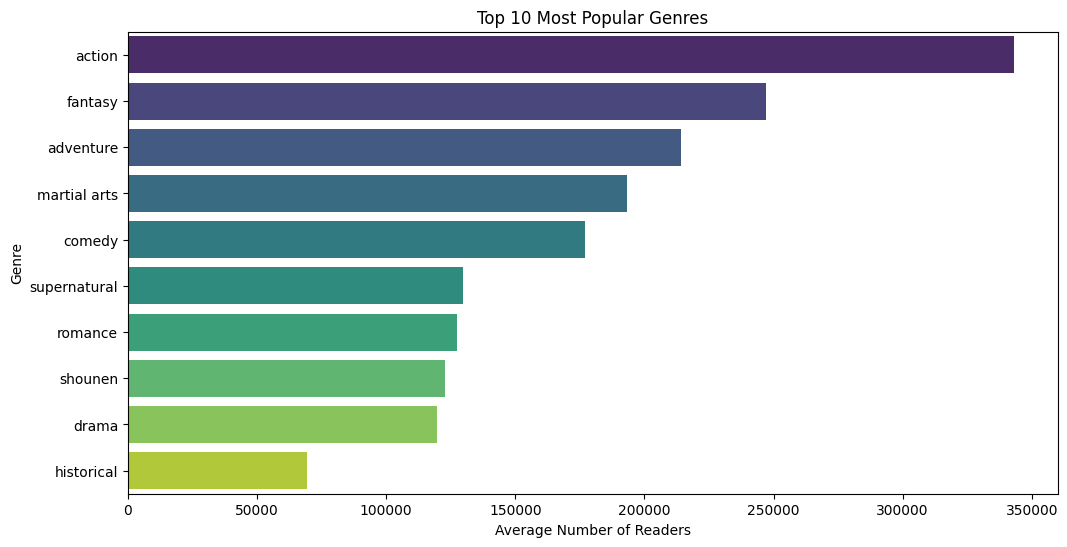

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_popularity.head(10).values, y=genre_popularity.head(10).index, palette="viridis")
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Average Number of Readers')
plt.ylabel('Genre')
plt.show()

# **Asosiasi antar Genre dengan Apriori**

In [ ]:
pip install mlxtend

In [ ]:
df

,Title,Jenis komik,Status,Last Chapter Number,Sinopsis,Jumlah Pembaca,Genre
0,Kimetsu no Yaiba,Manga,End,205.0,Manga Kimetsu no Yaiba merupakan komik karanga...,40959872,"[action, adventure, comedy, drama, historical,..."
1,Martial Peak,Manhua,Ongoing,2000.0,Manhua Martial Peak meripakan sebuah komik yan...,31959363,"[action, adventure, drama, fantasy, historical..."
2,Black Clover,Manga,Ongoing,368.0,Manga Black Clover dibuat oleh Yuuki Tabata ya...,20085529,"[action, comedy, fantasy, magic, shounen]"
3,One Punch Man,Manga,Ongoing,250.0,Manga One Punch Man merupakan komik yang dibua...,15551749,"[action, comedy, parodi, sci-fi, super power, ..."
4,Master of Legendary Realms,Manhua,Ongoing,360.0,"Setiap dunia seperti bunga, Alam sekuler seper...",15516853,"[action, adventure, fantasy, harem, historical..."
...,...,...,...,...,...,...,...
1643,Spirit Photographer Saburo Kono,Manga,End,0.0,HUT ke-4 The Promised Neverland! Karya terbaru...,506,"[psychological, shounen, supernatural]"
1644,Hitoribocchi no OO Seikatsu (Webcomic),Manga,End,5.0,Bocchi yang baru saja kehilangan teman satu-sa...,499,"[comedy, school life, shounen, slice of life]"
1645,Tiger Dragon Brothers,Manga,End,1.0,Dua bersaudara sedang mendaki gunung untuk mem...,409,"[action, martial arts]"
1646,Yume Midokoro,Manga,End,0.0,Oleh mangaka yang sama dari Nyoron Churuya-san...,372,"[comedy, shounen, slice of life]"


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Menggunakan TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(df['Genre']).transform(df['Genre'])
genres_df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(genres_df, min_support=0.1, use_colnames=True)  # Penyesuaian min_support
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

sorted_frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.569175,(action)
5,0.493932,(fantasy)
2,0.441748,(comedy)
9,0.426578,(romance)
1,0.352549,(adventure)
18,0.350121,"(fantasy, action)"
12,0.298544,(shounen)
15,0.281553,"(adventure, action)"
24,0.271238,"(fantasy, adventure)"
27,0.244539,"(romance, comedy)"


In [ ]:
# Get the most frequent itemset
most_frequent_itemset = sorted_frequent_itemsets.iloc[0]
print(most_frequent_itemset)

# Display the count of the most frequent itemset
most_frequent_itemset_count = most_frequent_itemset['support'] * len(genres_df)
print("Count of the most frequent itemset is :", most_frequent_itemset_count)

support     0.569175
itemsets    (action)
Name: 0, dtype: object
Count of the most frequent itemset is : 938.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Membuat aturan asosiasi
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Menampilkan aturan asosiasi
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(adventure),(action),0.352549,0.569175,0.281553,0.798623,1.403125,0.080892,2.139397,0.443747
1,(action),(adventure),0.569175,0.352549,0.281553,0.494670,1.403125,0.080892,1.281244,0.666871
2,(comedy),(action),0.441748,0.569175,0.189927,0.429945,0.755383,-0.061504,0.755761,-0.367121
3,(action),(comedy),0.569175,0.441748,0.189927,0.333689,0.755383,-0.061504,0.837825,-0.429111
4,(drama),(action),0.218447,0.569175,0.116505,0.533333,0.937029,-0.007829,0.923197,-0.079178
...,...,...,...,...,...,...,...,...,...,...
63,"(romance, school life)",(comedy),0.151699,0.441748,0.112257,0.740000,1.675165,0.045245,2.147125,0.475119
64,"(comedy, school life)",(romance),0.141990,0.426578,0.112257,0.790598,1.853351,0.051687,2.738384,0.536634
65,(romance),"(comedy, school life)",0.426578,0.141990,0.112257,0.263158,1.853351,0.051687,1.164442,0.802963
66,(comedy),"(romance, school life)",0.441748,0.151699,0.112257,0.254121,1.675165,0.045245,1.137317,0.721974


In [ ]:
# Membuat aturan asosiasi
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Menampilkan aturan asosiasi
rules2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(adventure),(action),0.352549,0.569175,0.281553,0.798623,1.403125,0.080892,2.139397,0.443747
1,(action),(adventure),0.569175,0.352549,0.281553,0.494670,1.403125,0.080892,1.281244,0.666871
2,(fantasy),(action),0.493932,0.569175,0.350121,0.708845,1.245391,0.068988,1.479712,0.389354
3,(action),(fantasy),0.569175,0.493932,0.350121,0.615139,1.245391,0.068988,1.314936,0.457353
4,(martial arts),(action),0.162015,0.569175,0.145631,0.898876,1.579263,0.053416,4.260383,0.437708
5,(action),(martial arts),0.569175,0.162015,0.145631,0.255864,1.579263,0.053416,1.126118,0.851373
6,(shounen),(action),0.298544,0.569175,0.171723,0.575203,1.010592,0.001800,1.014191,0.014941
7,(action),(shounen),0.569175,0.298544,0.171723,0.301706,1.010592,0.001800,1.004528,0.024327
8,(supernatural),(action),0.185073,0.569175,0.119539,0.645902,1.134804,0.014200,1.216682,0.145768
9,(action),(supernatural),0.569175,0.185073,0.119539,0.210021,1.134804,0.014200,1.031581,0.275727


In [ ]:
# Filter aturan dengan kombinasi 2 genre atau lebih
filtered_rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 2)]

# Menampilkan aturan asosiasi dengan kombinasi 2 genre atau lebih
filtered_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
44,"(fantasy, adventure)",(action),0.271238,0.569175,0.212379,0.782998,1.375672,0.057997,1.985349,0.374721
45,"(adventure, action)",(fantasy),0.281553,0.493932,0.212379,0.754310,1.527154,0.073310,2.059785,0.480463
46,"(fantasy, action)",(adventure),0.350121,0.352549,0.212379,0.606586,1.720574,0.088944,1.645725,0.644426
50,"(fantasy, comedy)",(action),0.189320,0.569175,0.124393,0.657051,1.154393,0.016637,1.256238,0.164977
51,"(fantasy, action)",(comedy),0.350121,0.441748,0.124393,0.355286,0.804274,-0.030272,0.865892,-0.272445
52,"(comedy, action)",(fantasy),0.189927,0.493932,0.124393,0.654952,1.325996,0.030582,1.466660,0.303491
56,"(fantasy, comedy)",(adventure),0.189320,0.352549,0.103762,0.548077,1.554614,0.037018,1.432659,0.440067
57,"(fantasy, adventure)",(comedy),0.271238,0.441748,0.103762,0.382550,0.865993,-0.016057,0.904126,-0.175147
58,"(comedy, adventure)",(fantasy),0.123180,0.493932,0.103762,0.842365,1.705426,0.042920,3.210369,0.471746
62,"(romance, comedy)",(school life),0.244539,0.210558,0.112257,0.459057,2.180190,0.060768,1.459381,0.716548


In [ ]:
# Filter aturan dengan kombinasi 2 genre atau lebih
filtered_rules = rules[rules['consequents'].apply(lambda x: len(x) >= 2)]

# Menampilkan aturan asosiasi dengan kombinasi 2 genre atau lebih
filtered_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19,(adventure),"(fantasy, action)",0.352549,0.350121,0.212379,0.602410,1.720574,0.088944,1.634543,0.646842
26,(school life),"(romance, comedy)",0.210558,0.244539,0.112257,0.533141,2.180190,0.060768,1.618179,0.685705


In [ ]:
# Filter aturan dengan kombinasi 2 genre atau lebih
filtered_rules2 = rules2[rules2['antecedents'].apply(lambda x: len(x) >= 2)]

# Menampilkan aturan asosiasi dengan kombinasi 2 genre atau lebih
filtered_rules2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,"(fantasy, adventure)",(action),0.271238,0.569175,0.212379,0.782998,1.375672,0.057997,1.985349,0.374721
29,"(adventure, action)",(fantasy),0.281553,0.493932,0.212379,0.754310,1.527154,0.073310,2.059785,0.480463
30,"(fantasy, action)",(adventure),0.350121,0.352549,0.212379,0.606586,1.720574,0.088944,1.645725,0.644426
34,"(fantasy, comedy)",(action),0.189320,0.569175,0.124393,0.657051,1.154393,0.016637,1.256238,0.164977
35,"(comedy, action)",(fantasy),0.189927,0.493932,0.124393,0.654952,1.325996,0.030582,1.466660,0.303491
38,"(fantasy, comedy)",(adventure),0.189320,0.352549,0.103762,0.548077,1.554614,0.037018,1.432659,0.440067
39,"(comedy, adventure)",(fantasy),0.123180,0.493932,0.103762,0.842365,1.705426,0.042920,3.210369,0.471746
42,"(romance, comedy)",(school life),0.244539,0.210558,0.112257,0.459057,2.180190,0.060768,1.459381,0.716548
43,"(romance, school life)",(comedy),0.151699,0.441748,0.112257,0.740000,1.675165,0.045245,2.147125,0.475119
44,"(comedy, school life)",(romance),0.141990,0.426578,0.112257,0.790598,1.853351,0.051687,2.738384,0.536634


In [ ]:
# Filter aturan dengan kombinasi 2 genre atau lebih
filtered_rules2 = rules2[rules2['consequents'].apply(lambda x: len(x) >= 2)]

# Menampilkan aturan asosiasi dengan kombinasi 2 genre atau lebih
filtered_rules2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(adventure),"(fantasy, action)",0.352549,0.350121,0.212379,0.602410,1.720574,0.088944,1.634543,0.646842
32,(fantasy),"(adventure, action)",0.493932,0.281553,0.212379,0.429975,1.527154,0.073310,1.260378,0.682097
33,(action),"(fantasy, adventure)",0.569175,0.271238,0.212379,0.373134,1.375672,0.057997,1.162549,0.633859
36,(fantasy),"(comedy, action)",0.493932,0.189927,0.124393,0.251843,1.325996,0.030582,1.082757,0.485805
37,(action),"(fantasy, comedy)",0.569175,0.189320,0.124393,0.218550,1.154393,0.016637,1.037404,0.310436
40,(fantasy),"(comedy, adventure)",0.493932,0.123180,0.103762,0.210074,1.705426,0.042920,1.110003,0.817353
41,(adventure),"(fantasy, comedy)",0.352549,0.189320,0.103762,0.294320,1.554614,0.037018,1.148792,0.551012
45,(romance),"(comedy, school life)",0.426578,0.141990,0.112257,0.263158,1.853351,0.051687,1.164442,0.802963
46,(comedy),"(romance, school life)",0.441748,0.151699,0.112257,0.254121,1.675165,0.045245,1.137317,0.721974
47,(school life),"(romance, comedy)",0.210558,0.244539,0.112257,0.533141,2.180190,0.060768,1.618179,0.685705


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


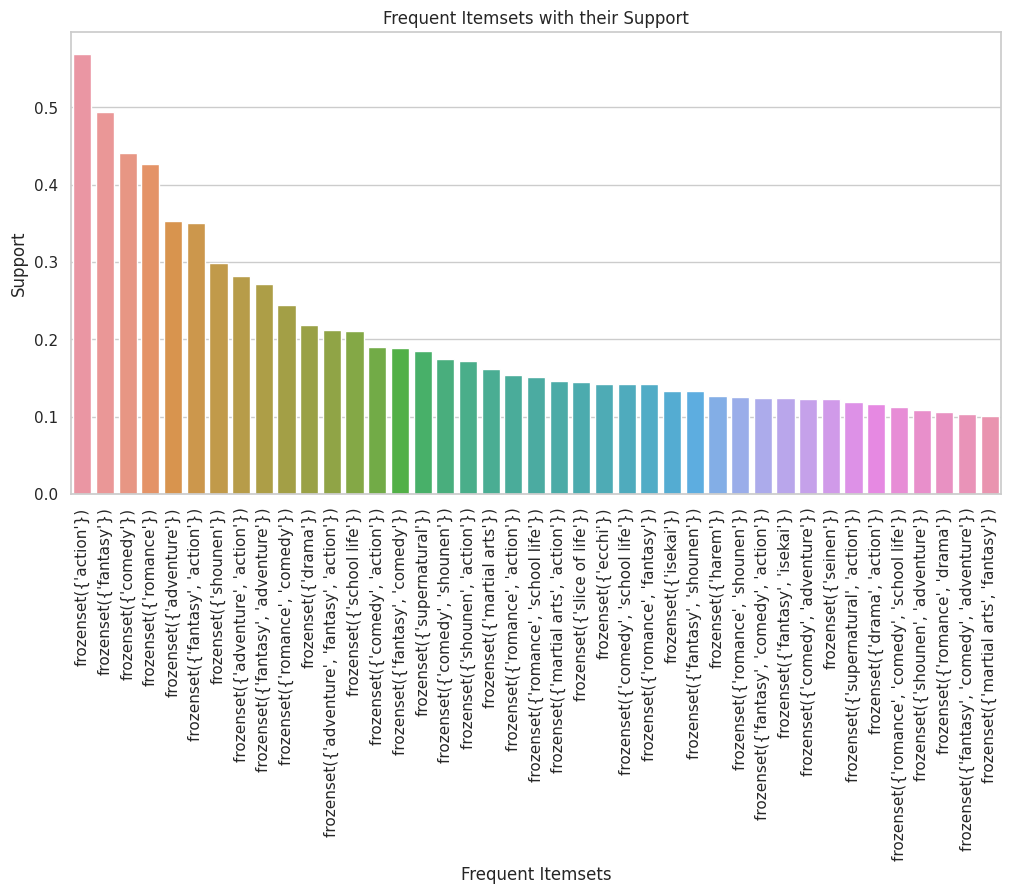

In [ ]:
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Plotting the frequent itemsets using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='itemsets', y='support', data=sorted_frequent_itemsets)
ax.set(xlabel='Frequent Itemsets', ylabel='Support', title='Frequent Itemsets with their Support')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='support', ylabel='confidence'>

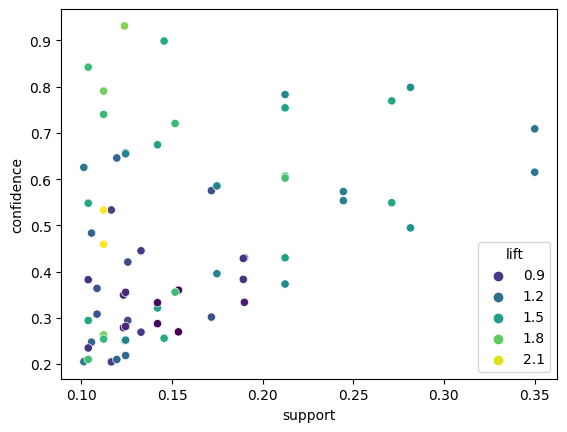

In [ ]:
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift', palette='viridis')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='antecedent support', ylabel='antecedents'>

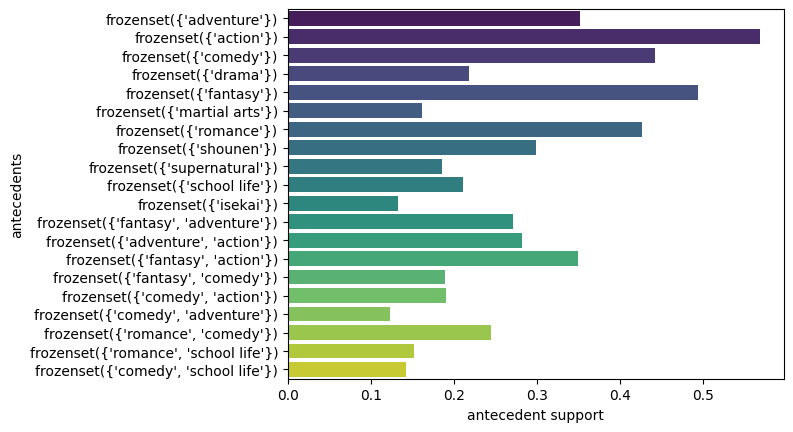

In [ ]:
sns.barplot(x=rules['antecedent support'], y=rules['antecedents'], palette="viridis")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='consequent support', ylabel='consequents'>

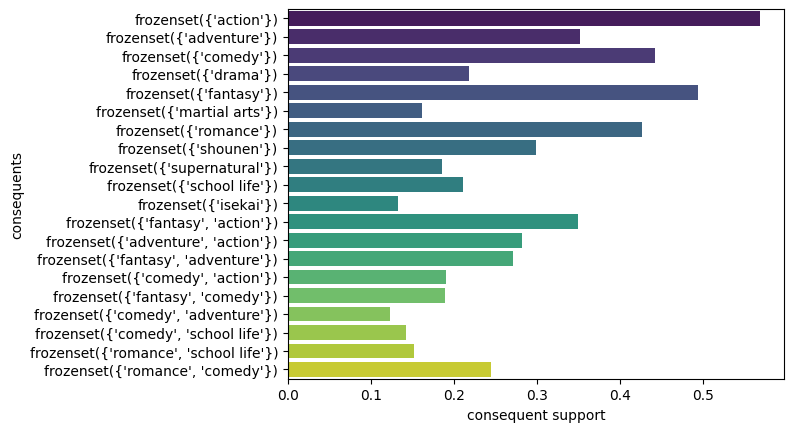

In [ ]:
sns.barplot(x=rules["consequent support"], y=rules["consequents"], palette="viridis")

In [ ]:
sorted_rules = rules.sort_values(by='lift', ascending=False)
highest_lift_rule = sorted_rules.iloc[0]

highest_lift_rule

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents           (comedy, romance)
consequents               (school life)
antecedent support             0.244539
consequent support             0.210558
support                        0.112257
confidence                     0.459057
lift                            2.18019
leverage                       0.060768
conviction                     1.459381
zhangs_metric                  0.716548
Name: 62, dtype: object

In [ ]:
sorted_rules_2 = rules.sort_values(by='confidence', ascending=False)
highest_conf_rule = sorted_rules_2.iloc[0]

highest_conf_rule

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents            (isekai)
consequents           (fantasy)
antecedent support     0.132888
consequent support     0.493932
support                0.123786
confidence             0.931507
lift                   1.885901
leverage               0.058149
conviction             7.388592
zhangs_metric           0.54174
Name: 13, dtype: object

In [ ]:
def display_usual_pairs_ant(rules_df, antecedent):
    # Filter rules where the specified antecedent is present in the antecedents
    filtered_rules = rules_df[rules_df['antecedents'].apply(lambda x: antecedent in x)]

    usual_pairs = filtered_rules['consequents'].explode().value_counts()

    print(f"Usual pairs from antecedent '{antecedent}':")
    print(usual_pairs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
display_usual_pairs_ant(rules, 'action')
print("___________________________")
display_usual_pairs_ant(rules2, 'action')

Usual pairs from antecedent 'action':
fantasy      3
adventure    1
Name: consequents, dtype: int64
___________________________
Usual pairs from antecedent 'action':
fantasy         5
adventure       3
martial arts    1
shounen         1
supernatural    1
comedy          1
Name: consequents, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def display_usual_pairs_consq(rules_df, consequents):
    # Filter rules where the specified antecedent is present in the consequent
    filtered_rules = rules_df[rules_df['consequents'].apply(lambda x: consequents in x)]

    usual_pairs = filtered_rules['antecedents'].explode().value_counts()

    print(f"Usual pairs from consequents '{consequents}':")
    print(usual_pairs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
display_usual_pairs_consq(rules, 'action')
print("___________________________")
display_usual_pairs_consq(rules2, 'action')

Usual pairs from consequents 'action':
adventure       3
fantasy         3
drama           1
martial arts    1
shounen         1
supernatural    1
comedy          1
Name: antecedents, dtype: int64
___________________________
Usual pairs from consequents 'action':
fantasy         5
adventure       3
martial arts    1
shounen         1
supernatural    1
comedy          1
Name: antecedents, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
